##**Name- Sharayu Suresh Phatangare**

LetsGrowMore- Virtual Internship Program

Advanced Level

Task 5 :- Develop a Neural Network that can read Handwriting

Importing libraries

In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

Loading the MNIST handwritten digit data

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


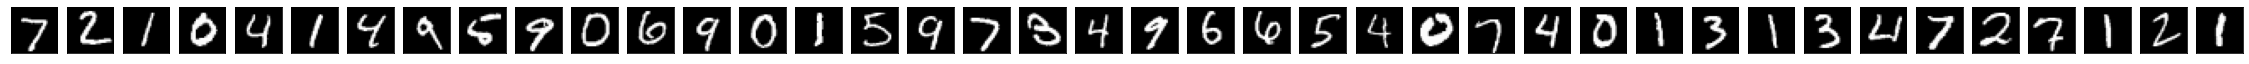

In [ ]:
import matplotlib.pyplot as plt
n = 40  
plt.figure(figsize=(40, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

In [ ]:
print("Previous x_train shape: {} \nPrevious y_train shape:{}".format(x_train.shape, y_train.shape))
x_train = x_train.reshape(60000, 784)     
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')     
x_test = x_test.astype('float32')     
x_train /= 255    
x_test /= 255
classes = 10
y_train = np_utils.to_categorical(y_train, classes)     
y_test = np_utils.to_categorical(y_test, classes)
print("New x_train shape: {} \nNew y_train shape:{}".format(x_train.shape, y_train.shape))

Previous x_train shape: (60000, 28, 28) 
Previous y_train shape:(60000,)
New x_train shape: (60000, 784) 
New y_train shape:(60000, 10)


In [ ]:
#Setting parameters
input_size = 784
batch_size = 200   
hidden1 = 400
hidden2 = 20
epochs = 2

In [ ]:
#Building Model
model = Sequential()     
model.add(Dense(hidden1, input_dim=input_size, activation='relu'))

model.add(Dense(hidden2, activation='relu'))
model.add(Dense(classes, activation='softmax')) 

model.compile(loss='categorical_crossentropy', 
metrics=['accuracy'], optimizer='sgd')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               314000    
                                                                 
 dense_1 (Dense)             (None, 20)                8020      
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 322,230
Trainable params: 322,230
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=100, verbose=2)

Epoch 1/100
300/300 - 3s - loss: 1.6288 - accuracy: 0.5453 - 3s/epoch - 9ms/step
Epoch 2/100
300/300 - 2s - loss: 0.7585 - accuracy: 0.8075 - 2s/epoch - 8ms/step
Epoch 3/100
300/300 - 2s - loss: 0.5031 - accuracy: 0.8655 - 2s/epoch - 8ms/step
Epoch 4/100
300/300 - 2s - loss: 0.4174 - accuracy: 0.8843 - 2s/epoch - 8ms/step
Epoch 5/100
300/300 - 2s - loss: 0.3722 - accuracy: 0.8949 - 2s/epoch - 7ms/step
Epoch 6/100
300/300 - 2s - loss: 0.3427 - accuracy: 0.9032 - 2s/epoch - 7ms/step
Epoch 7/100
300/300 - 2s - loss: 0.3206 - accuracy: 0.9092 - 2s/epoch - 7ms/step
Epoch 8/100
300/300 - 2s - loss: 0.3032 - accuracy: 0.9138 - 2s/epoch - 8ms/step
Epoch 9/100
300/300 - 2s - loss: 0.2886 - accuracy: 0.9176 - 2s/epoch - 7ms/step
Epoch 10/100
300/300 - 2s - loss: 0.2758 - accuracy: 0.9217 - 2s/epoch - 7ms/step
Epoch 11/100
300/300 - 2s - loss: 0.2643 - accuracy: 0.9251 - 2s/epoch - 7ms/step
Epoch 12/100
300/300 - 2s - loss: 0.2540 - accuracy: 0.9280 - 2s/epoch - 7ms/step
Epoch 13/100
300/300 - 2s

Testing the model

313/313 [==============================] - 1s 3ms/step - loss: 0.0810 - accuracy: 0.9747

Test accuracy: 0.9746999740600586
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1]


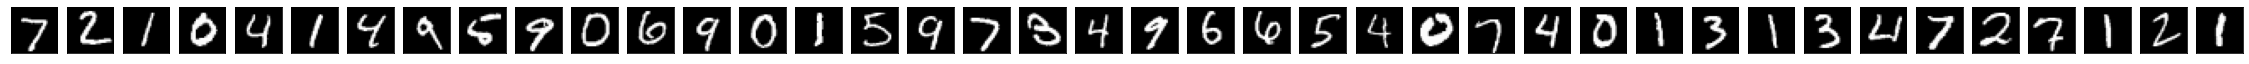

In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)
print('\n''Test accuracy:', score[1])
mask = range(0,40)
x_valid = x_test[mask]
predict_y=model.predict(x_valid) 
classes_y=np.argmax(predict_y,axis=1)
print(classes_y)

# display original
plt.figure(figsize=(40, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_valid[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()
